# Comparing Detectors

The purpose of this notebook is to compare the results of tests with specific detectors. We are using PuBe source data for this comparison.

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import lmfit as lf
import matplotlib.pyplot as plt
from scipy.interpolate import InterpolatedUnivariateSpline as interp

In [2]:
#Import data

path = 'data/PuBe/overnightdetcal/'

det01 = pd.read_csv(path+'det1.csv')

#All thresholds are defined to be the same.
thresh = (det01.iloc[:,0] + det01.iloc[:,1])/2
del det01

#Ranges will be stored in order.
ranges = []
for i in range(24):
    try:
        ranges.append(np.asarray(pd.read_csv(path+'det'+str(i)+'.csv').iloc[:,2]))
    except FileNotFoundError:
        ranges.append([])

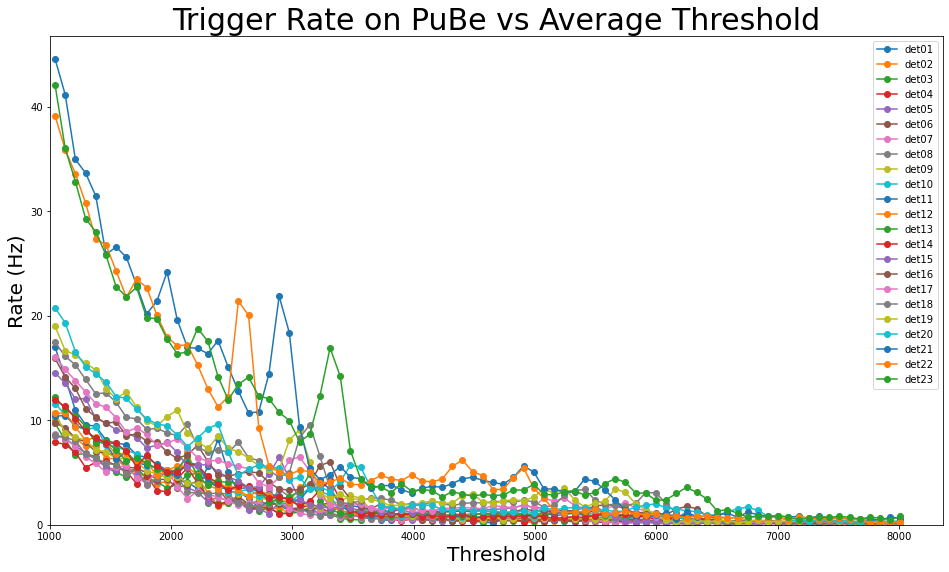

In [3]:
plt.figure(figsize=(16,9))

for i,n in enumerate(ranges):
    if np.asarray(n).size != 0:
        plt.plot(thresh,n,label='det{:02d}'.format(i),marker='o')

plt.xlabel("Threshold",size=20)
plt.ylabel("Rate (Hz)",size=20)
plt.title("Trigger Rate on PuBe vs Average Threshold",size=30)
plt.rc('xtick', labelsize=16) #fontsize of the x tick labels
plt.rc('ytick', labelsize=16) #fontsize of the y tick labels
#lt.yscale('log')
plt.xlim(1000)
plt.ylim(0)

plt.legend()
plt.show()

# Individual Plotting
Pick a number, any number, as long as it's one we have data for.

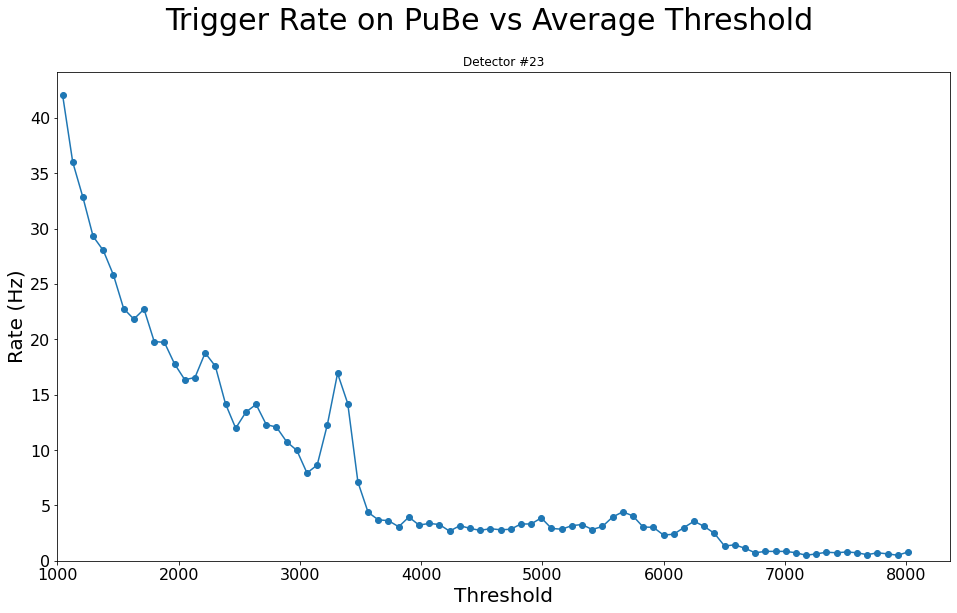

In [4]:
detnum = 23

plt.figure(figsize=(16,9))

plt.plot(thresh,ranges[detnum],label='det{:02d}'.format(detnum),marker='o')

plt.xlabel("Threshold",size=20)
plt.ylabel("Rate (Hz)",size=20)
plt.suptitle("Trigger Rate on PuBe vs Average Threshold",size=30)
plt.title("Detector #{:02d}".format(detnum))
plt.rc('xtick', labelsize=16) #fontsize of the x tick labels
plt.rc('ytick', labelsize=16) #fontsize of the y tick labels

plt.xlim(1000)
plt.ylim(0)

plt.show()

# Calibration

Now here's the long section, where we calibrate every detector one by one.

## Finding the calibration lines

In [ ]:
#set up some empty arrays to fill later
#each contains an empty array to start counting from 1 instead of 0.
bins = [[]]
energies = [[]]

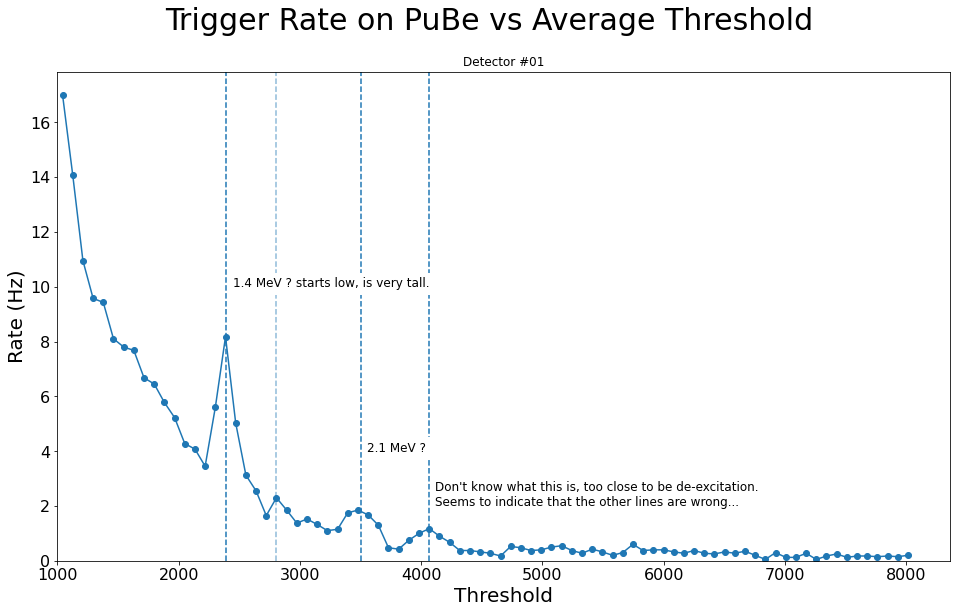

In [64]:
detnum = 1

plt.figure(figsize=(16,9))

plt.plot(thresh,ranges[detnum],label='det{:02d}'.format(detnum),marker='o')

plt.xlabel("Threshold",size=20)
plt.ylabel("Rate (Hz)",size=20)
plt.suptitle("Trigger Rate on PuBe vs Average Threshold",size=30)
plt.title("Detector #{:02d}".format(detnum))
plt.rc('xtick', labelsize=16) #fontsize of the x tick labels
plt.rc('ytick', labelsize=16) #fontsize of the y tick labels

plt.xlim(1000)
plt.ylim(0)

a = 2394
b = 2800
c = 3500
d = 4060

plt.axvline(a,linestyle='--')
plt.text(a+50,10,"1.4 MeV ? starts low, is very tall.",fontsize=12,backgroundcolor='white')
plt.axvline(b,linestyle='--',alpha=0.5)
#plt.text(b+50,4,"What is this peak?\nIt is small but seems to appear somewhat consistently.\nIf not something we calibrate against, at least useful for locating 2.1 Mev line.",fontsize=12,backgroundcolor='white')
plt.axvline(c,linestyle='--')
plt.text(c+50,4,"2.1 MeV ?",fontsize=12,backgroundcolor='white')
plt.axvline(d,linestyle='--')
plt.text(d+50,2,"Don't know what this is, too close to be de-excitation.\nSeems to indicate that the other lines are wrong...",fontsize=12,backgroundcolor='white')

bins01 = [a,c]
energies01 = []

plt.show()

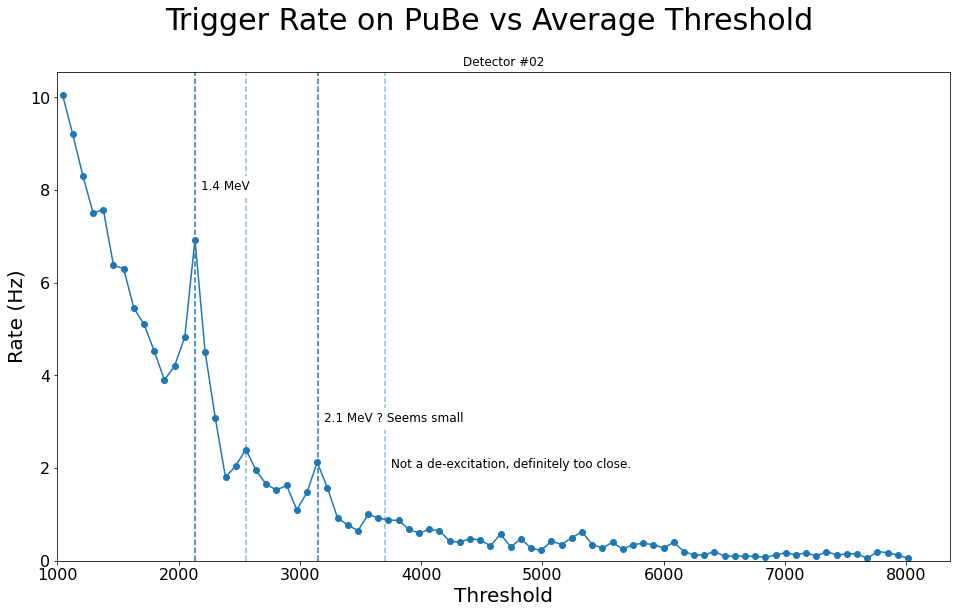

In [65]:
detnum = 2

plt.figure(figsize=(16,9))

plt.plot(thresh,ranges[detnum],label='det{:02d}'.format(detnum),marker='o')

plt.xlabel("Threshold",size=20)
plt.ylabel("Rate (Hz)",size=20)
plt.suptitle("Trigger Rate on PuBe vs Average Threshold",size=30)
plt.title("Detector #{:02d}".format(detnum))
plt.rc('xtick', labelsize=16) #fontsize of the x tick labels
plt.rc('ytick', labelsize=16) #fontsize of the y tick labels

plt.xlim(1000)
plt.ylim(0)

a = 2135
b = 2552
c = 3150
d = 3700

plt.axvline(a,linestyle='--')
plt.text(a+50,8,"1.4 MeV",fontsize=12,backgroundcolor='white')
plt.axvline(b,linestyle='--',alpha=0.5)
plt.axvline(c,linestyle='--')
plt.text(c+50,3,"2.1 MeV ? Seems small",fontsize=12,backgroundcolor='white')
plt.axvline(d,linestyle='--',alpha=0.5)
plt.text(d+50,2,"Not a de-excitation, definitely too close.",fontsize=12,backgroundcolor='white')

bins02 = [a,c]
energies02 = [1.4,2.1]

plt.show()

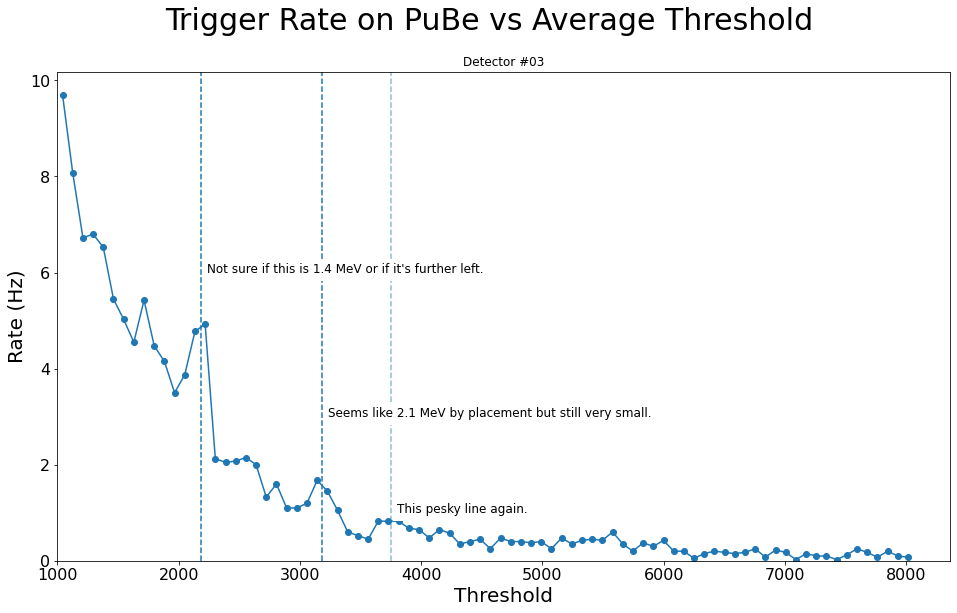

In [66]:
detnum = 3

plt.figure(figsize=(16,9))

plt.plot(thresh,ranges[detnum],label='det{:02d}'.format(detnum),marker='o')

plt.xlabel("Threshold",size=20)
plt.ylabel("Rate (Hz)",size=20)
plt.suptitle("Trigger Rate on PuBe vs Average Threshold",size=30)
plt.title("Detector #{:02d}".format(detnum))
plt.rc('xtick', labelsize=16) #fontsize of the x tick labels
plt.rc('ytick', labelsize=16) #fontsize of the y tick labels

plt.xlim(1000)
plt.ylim(0)

a = 2185
b = 3180
c = 3750

plt.axvline(a,linestyle='--')
plt.text(a+50,6,"Not sure if this is 1.4 MeV or if it's further left.",fontsize=12,backgroundcolor='white')
plt.axvline(b,linestyle='--')
plt.text(b+50,3,"Seems like 2.1 MeV by placement but still very small.",fontsize=12,backgroundcolor='white')
plt.axvline(c,linestyle='--',alpha=0.5)
plt.text(c+50,1,"This pesky line again.",fontsize=12,backgroundcolor='white')

bins03 = [a,b]
energies03 = []

plt.show()

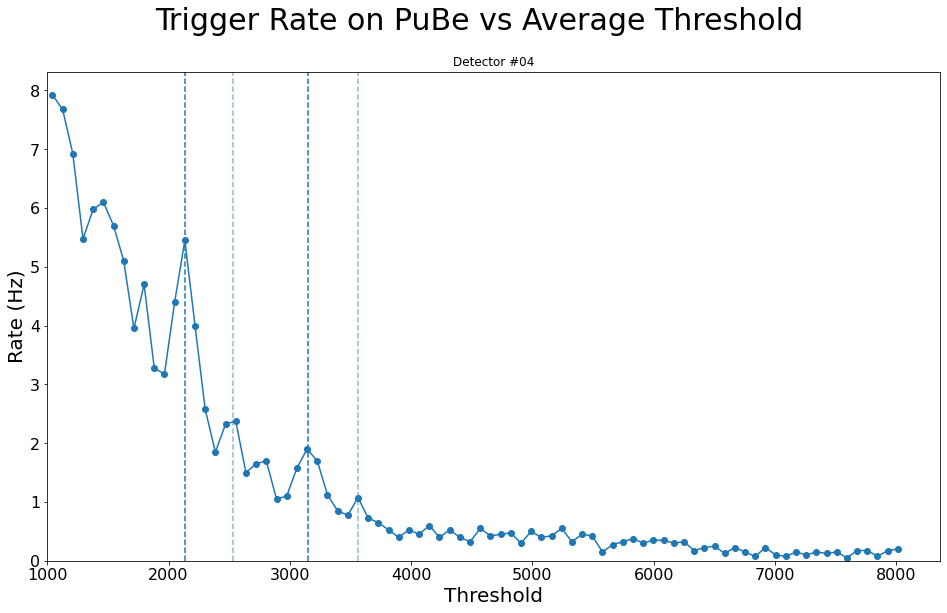

In [8]:
detnum = 4

plt.figure(figsize=(16,9))

plt.plot(thresh,ranges[detnum],label='det{:02d}'.format(detnum),marker='o')

plt.xlabel("Threshold",size=20)
plt.ylabel("Rate (Hz)",size=20)
plt.suptitle("Trigger Rate on PuBe vs Average Threshold",size=30)
plt.title("Detector #{:02d}".format(detnum))
plt.rc('xtick', labelsize=16) #fontsize of the x tick labels
plt.rc('ytick', labelsize=16) #fontsize of the y tick labels

plt.xlim(1000)
plt.ylim(0)

a = 2139
b = 2534
c = 3150
d = 3562

plt.axvline(a,linestyle='--')
plt.text(a+50,6,"1.4 MeV?",fontsize=12,backgroundcolor='white')
plt.axvline(b,linestyle='--',alpha=0.5)
plt.text(c+50,2.5,"2.1 MeV?"
plt.axvline(c,linestyle='--')
plt.axvline(d,linestyle='--',alpha=0.5)

bins04 = [a,c]
energies04 = []

plt.show()

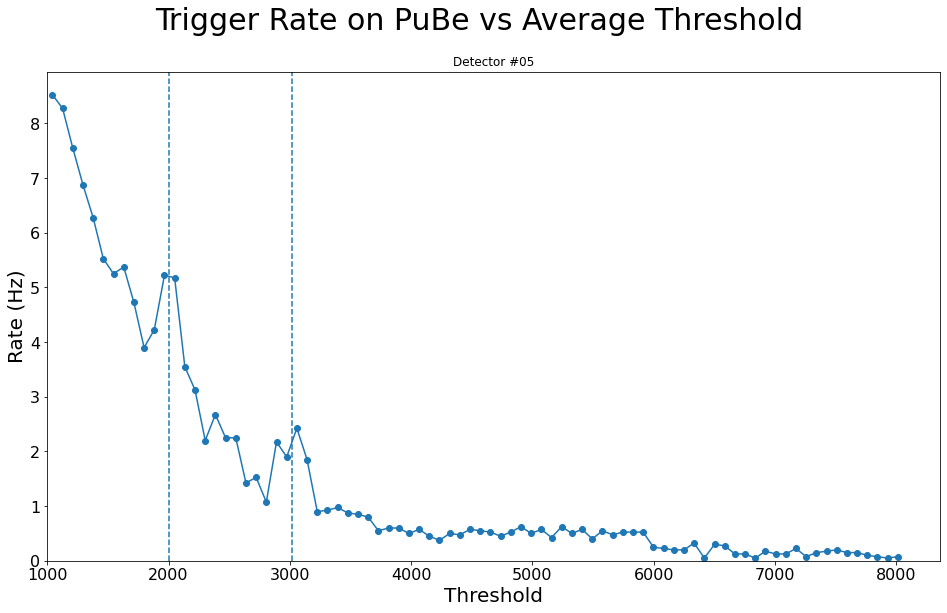

In [9]:
detnum = 5

plt.figure(figsize=(16,9))

plt.plot(thresh,ranges[detnum],label='det{:02d}'.format(detnum),marker='o')

plt.xlabel("Threshold",size=20)
plt.ylabel("Rate (Hz)",size=20)
plt.suptitle("Trigger Rate on PuBe vs Average Threshold",size=30)
plt.title("Detector #{:02d}".format(detnum))
plt.rc('xtick', labelsize=16) #fontsize of the x tick labels
plt.rc('ytick', labelsize=16) #fontsize of the y tick labels

plt.xlim(1000)
plt.ylim(0)

a = 2000
b = 3020

plt.axvline(a,linestyle='--')
plt.axvline(b,linestyle='--')

bins05 = [a,b]
energies05 = []

plt.show()

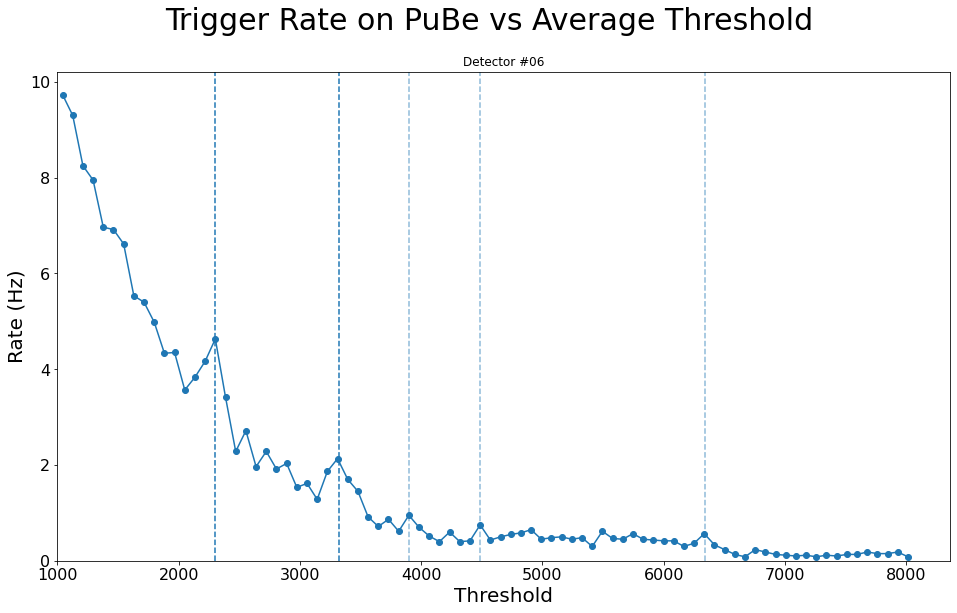

In [10]:
detnum = 6

plt.figure(figsize=(16,9))

plt.plot(thresh,ranges[detnum],label='det{:02d}'.format(detnum),marker='o')

plt.xlabel("Threshold",size=20)
plt.ylabel("Rate (Hz)",size=20)
plt.suptitle("Trigger Rate on PuBe vs Average Threshold",size=30)
plt.title("Detector #{:02d}".format(detnum))
plt.rc('xtick', labelsize=16) #fontsize of the x tick labels
plt.rc('ytick', labelsize=16) #fontsize of the y tick labels

plt.xlim(1000)
plt.ylim(0)

a = 2300
b = 3320
c = 3900
d = 4485
e = 6340

plt.axvline(a,linestyle='--')
plt.axvline(b,linestyle='--')
plt.axvline(c,linestyle='--',alpha=0.5)
plt.axvline(d,linestyle='--',alpha=0.5)
plt.axvline(e,linestyle='--',alpha=0.5)

bins06 = [a,b]
energies06 = []

plt.show()

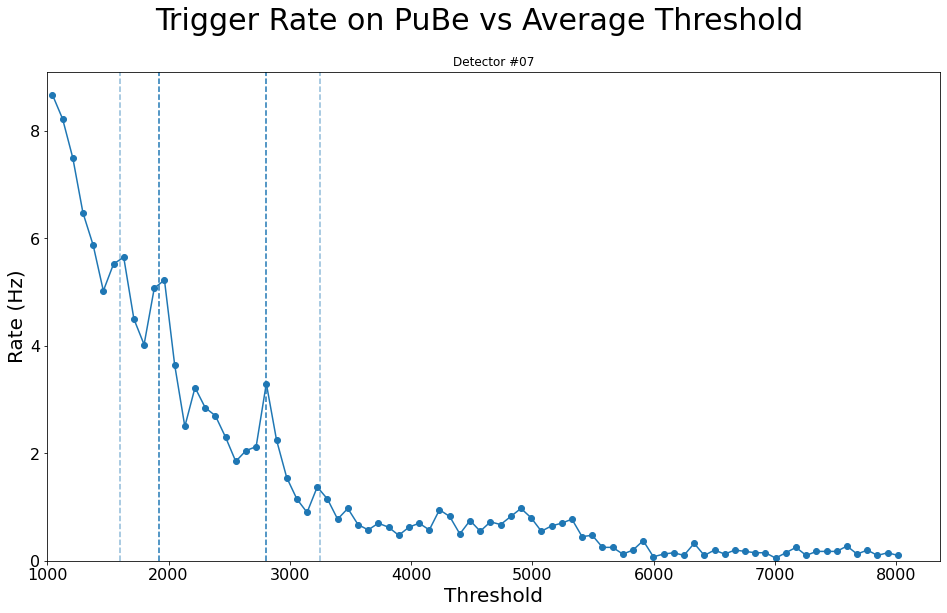

In [11]:
detnum = 7

plt.figure(figsize=(16,9))

plt.plot(thresh,ranges[detnum],label='det{:02d}'.format(detnum),marker='o')

plt.xlabel("Threshold",size=20)
plt.ylabel("Rate (Hz)",size=20)
plt.suptitle("Trigger Rate on PuBe vs Average Threshold",size=30)
plt.title("Detector #{:02d}".format(detnum))
plt.rc('xtick', labelsize=16) #fontsize of the x tick labels
plt.rc('ytick', labelsize=16) #fontsize of the y tick labels

plt.xlim(1000)
plt.ylim(0)

a = 1600
b = 1925
c = 2800
d = 3250

plt.axvline(a,linestyle='--',alpha=0.5)
plt.axvline(b,linestyle='--')
plt.axvline(c,linestyle='--')
plt.axvline(d,linestyle='--',alpha=0.5)

bins07 = [b,c]
energies07 = []

plt.show()

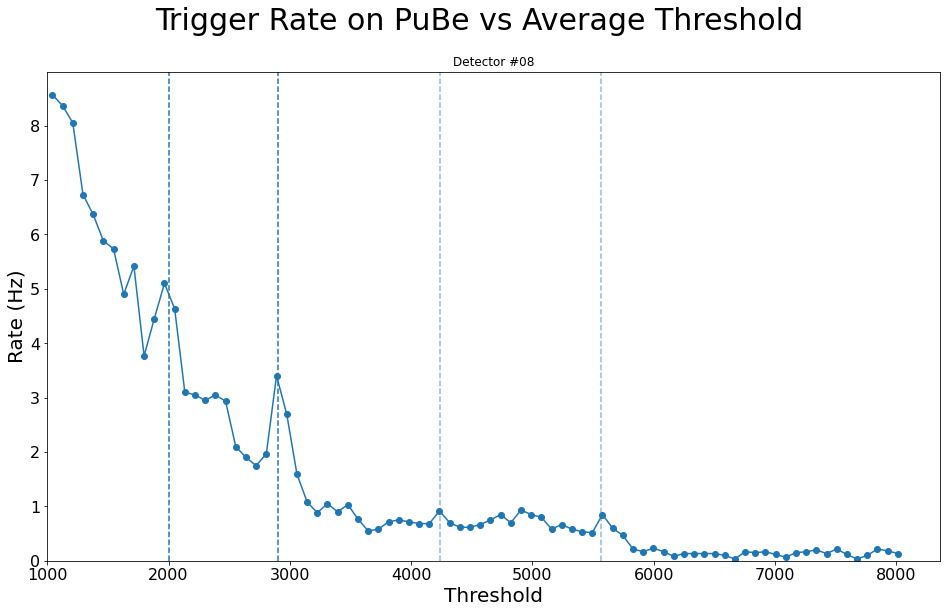

In [12]:
detnum = 8

plt.figure(figsize=(16,9))

plt.plot(thresh,ranges[detnum],label='det{:02d}'.format(detnum),marker='o')

plt.xlabel("Threshold",size=20)
plt.ylabel("Rate (Hz)",size=20)
plt.suptitle("Trigger Rate on PuBe vs Average Threshold",size=30)
plt.title("Detector #{:02d}".format(detnum))
plt.rc('xtick', labelsize=16) #fontsize of the x tick labels
plt.rc('ytick', labelsize=16) #fontsize of the y tick labels

plt.xlim(1000)
plt.ylim(0)

a = 2000
b = 2900
c = 4238
d = 5568

plt.axvline(a,linestyle='--')
plt.axvline(b,linestyle='--')
plt.axvline(c,linestyle='--',alpha=0.5)
plt.axvline(d,linestyle='--',alpha=0.5)

bins08 = [a,b]
energies08 = []

plt.show()

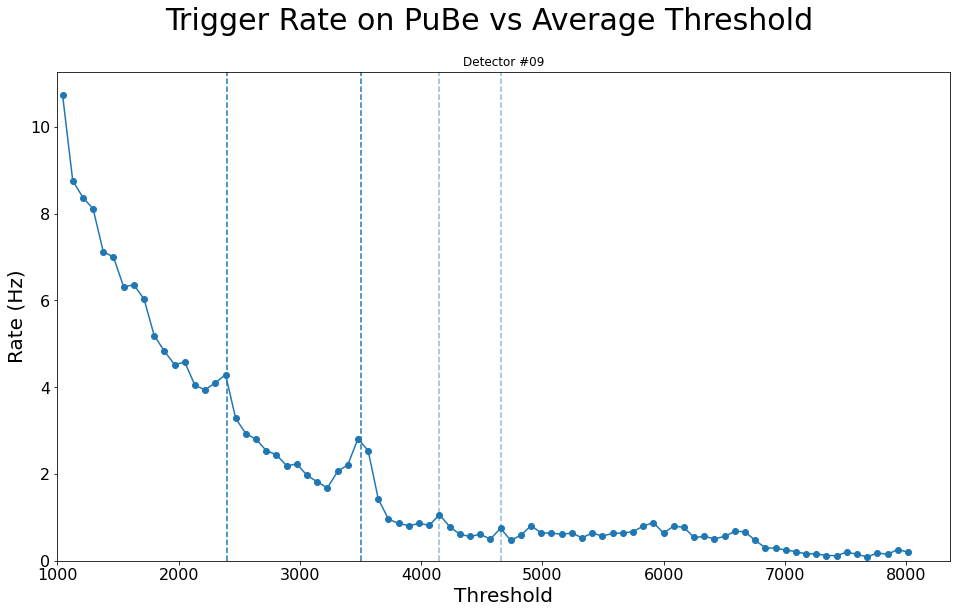

In [13]:
detnum = 9

plt.figure(figsize=(16,9))

plt.plot(thresh,ranges[detnum],label='det{:02d}'.format(detnum),marker='o')

plt.xlabel("Threshold",size=20)
plt.ylabel("Rate (Hz)",size=20)
plt.suptitle("Trigger Rate on PuBe vs Average Threshold",size=30)
plt.title("Detector #{:02d}".format(detnum))
plt.rc('xtick', labelsize=16) #fontsize of the x tick labels
plt.rc('ytick', labelsize=16) #fontsize of the y tick labels

plt.xlim(1000)
plt.ylim(0)

a = 2400
b = 3500
c = 4150
d = 4655

plt.axvline(a,linestyle='--')
plt.axvline(b,linestyle='--')
plt.axvline(c,linestyle='--',alpha=0.5)
plt.axvline(d,linestyle='--',alpha=0.5)

bins09 = [a,b]
energies09 = []

plt.show()

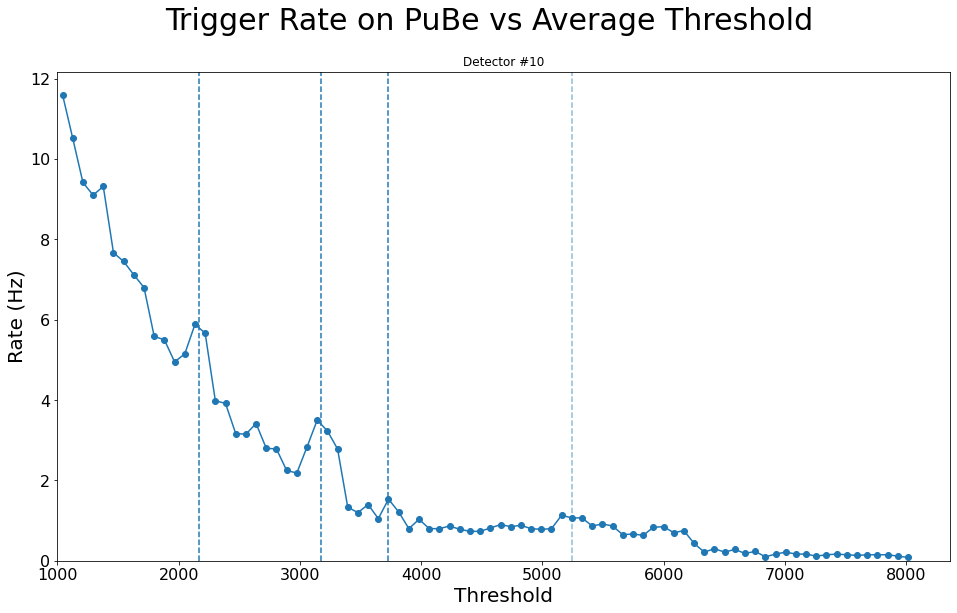

In [14]:
detnum = 10

plt.figure(figsize=(16,9))

plt.plot(thresh,ranges[detnum],label='det{:02d}'.format(detnum),marker='o')

plt.xlabel("Threshold",size=20)
plt.ylabel("Rate (Hz)",size=20)
plt.suptitle("Trigger Rate on PuBe vs Average Threshold",size=30)
plt.title("Detector #{:02d}".format(detnum))
plt.rc('xtick', labelsize=16) #fontsize of the x tick labels
plt.rc('ytick', labelsize=16) #fontsize of the y tick labels

plt.xlim(1000)
plt.ylim(0)

a = 2170
b = 3170
c = 3730
d = 5240

plt.axvline(a,linestyle='--')
plt.axvline(b,linestyle='--')
plt.axvline(c,linestyle='--')
plt.axvline(d,linestyle='--',alpha=0.5)

bins10 = [a,b,c]
energies10 = []

plt.show()

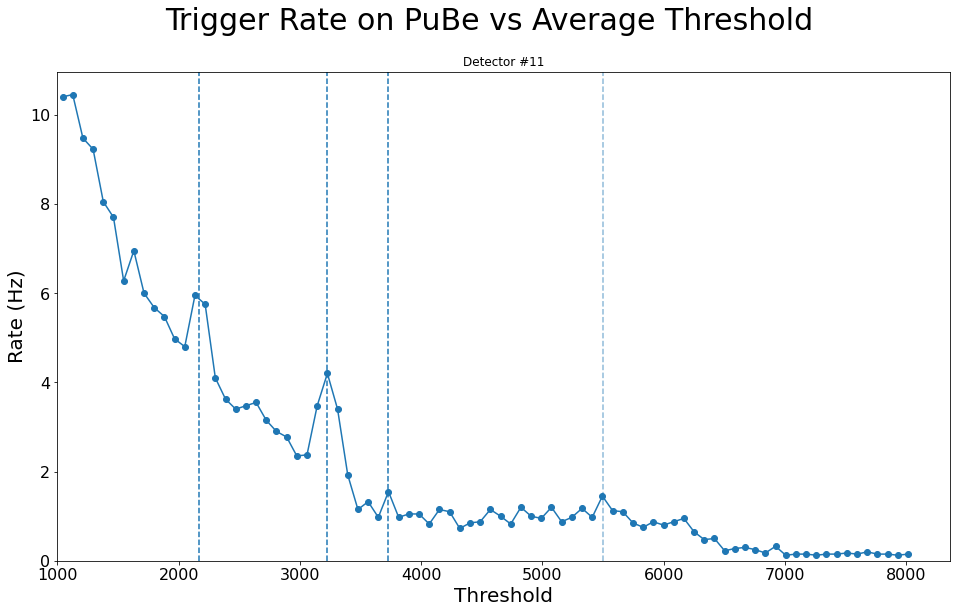

In [15]:
detnum = 11

plt.figure(figsize=(16,9))

plt.plot(thresh,ranges[detnum],label='det{:02d}'.format(detnum),marker='o')

plt.xlabel("Threshold",size=20)
plt.ylabel("Rate (Hz)",size=20)
plt.suptitle("Trigger Rate on PuBe vs Average Threshold",size=30)
plt.title("Detector #{:02d}".format(detnum))
plt.rc('xtick', labelsize=16) #fontsize of the x tick labels
plt.rc('ytick', labelsize=16) #fontsize of the y tick labels

plt.xlim(1000)
plt.ylim(0)

a = 2170
b = 3225
c = 3730
d = 5500

plt.axvline(a,linestyle='--')
plt.axvline(b,linestyle='--')
plt.axvline(c,linestyle='--')
plt.axvline(d,linestyle='--',alpha=0.5)

bins11 = [a,b,c]
energies11 = []

plt.show()

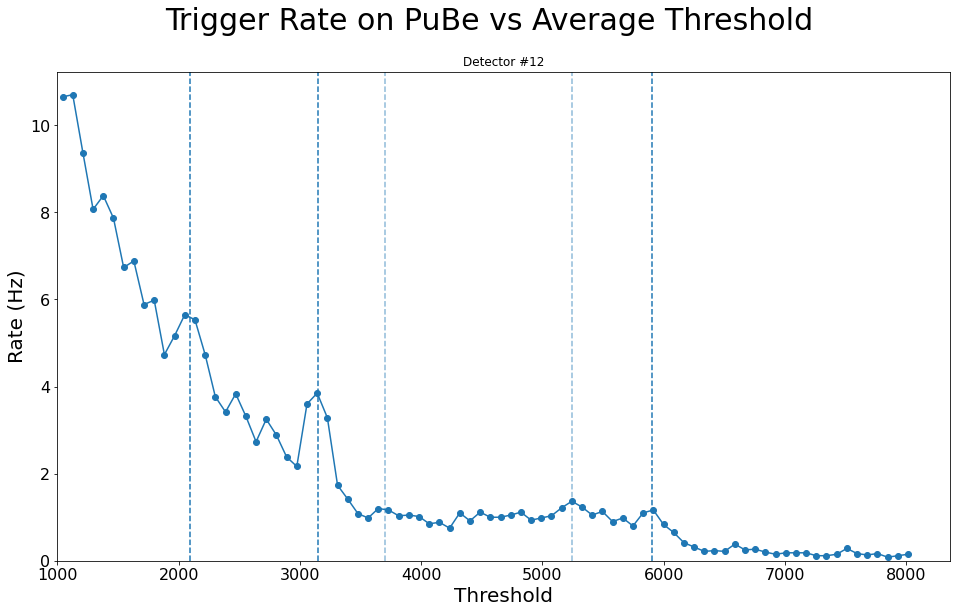

In [16]:
detnum = 12

plt.figure(figsize=(16,9))

plt.plot(thresh,ranges[detnum],label='det{:02d}'.format(detnum),marker='o')

plt.xlabel("Threshold",size=20)
plt.ylabel("Rate (Hz)",size=20)
plt.suptitle("Trigger Rate on PuBe vs Average Threshold",size=30)
plt.title("Detector #{:02d}".format(detnum))
plt.rc('xtick', labelsize=16) #fontsize of the x tick labels
plt.rc('ytick', labelsize=16) #fontsize of the y tick labels

plt.xlim(1000)
plt.ylim(0)

a = 2095
b = 3149
c = 3705
d = 5245
e = 5900

plt.axvline(a,linestyle='--')
plt.axvline(b,linestyle='--')
plt.axvline(c,linestyle='--',alpha=0.5)
plt.axvline(d,linestyle='--',alpha=0.5)
plt.axvline(e,linestyle='--')

bins12 = [a,b,e]
energies12 = []

plt.show()

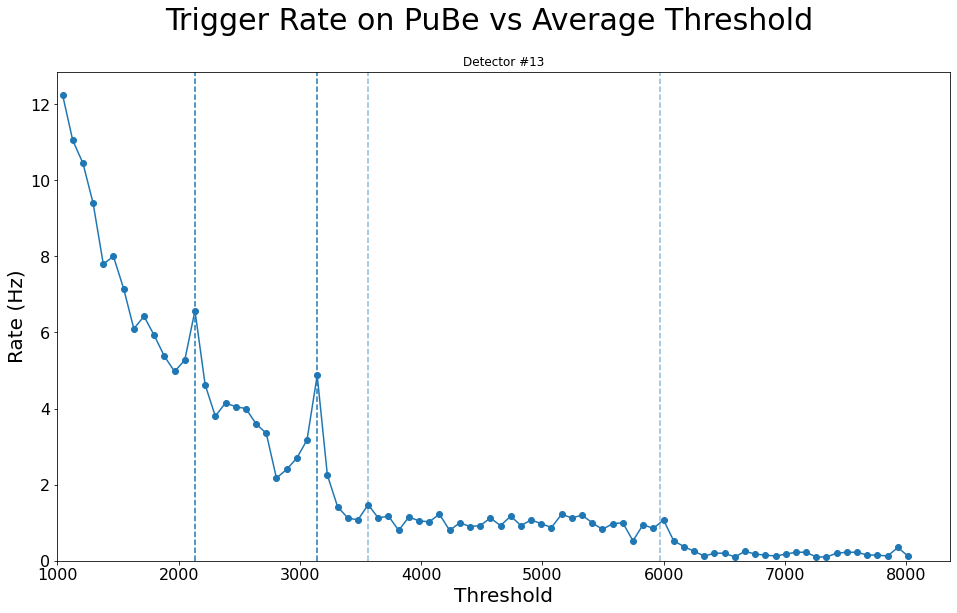

In [17]:
detnum = 13

plt.figure(figsize=(16,9))

plt.plot(thresh,ranges[detnum],label='det{:02d}'.format(detnum),marker='o')

plt.xlabel("Threshold",size=20)
plt.ylabel("Rate (Hz)",size=20)
plt.suptitle("Trigger Rate on PuBe vs Average Threshold",size=30)
plt.title("Detector #{:02d}".format(detnum))
plt.rc('xtick', labelsize=16) #fontsize of the x tick labels
plt.rc('ytick', labelsize=16) #fontsize of the y tick labels

plt.xlim(1000)
plt.ylim(0)

a = 2135
b = 3140
c = 3560
d = 5965

plt.axvline(a,linestyle='--')
plt.axvline(b,linestyle='--')
plt.axvline(c,linestyle='--',alpha=0.5)
plt.axvline(d,linestyle='--',alpha=0.5)

bins13 = [a,b]
energies13 = []

plt.show()

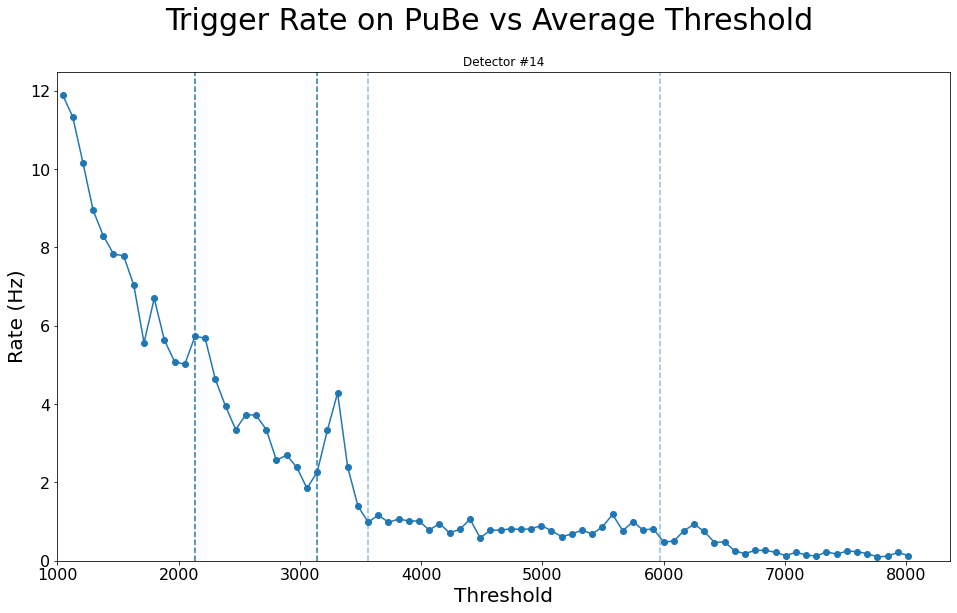

In [18]:
detnum = 14

plt.figure(figsize=(16,9))

plt.plot(thresh,ranges[detnum],label='det{:02d}'.format(detnum),marker='o')

plt.xlabel("Threshold",size=20)
plt.ylabel("Rate (Hz)",size=20)
plt.suptitle("Trigger Rate on PuBe vs Average Threshold",size=30)
plt.title("Detector #{:02d}".format(detnum))
plt.rc('xtick', labelsize=16) #fontsize of the x tick labels
plt.rc('ytick', labelsize=16) #fontsize of the y tick labels

plt.xlim(1000)
plt.ylim(0)

a = 2135
b = 3140
c = 3560
d = 5965

plt.axvline(a,linestyle='--')
plt.axvline(b,linestyle='--')
plt.axvline(c,linestyle='--',alpha=0.5)
plt.axvline(d,linestyle='--',alpha=0.5)

bins14 = [a,b]
energies14 = []

plt.show()

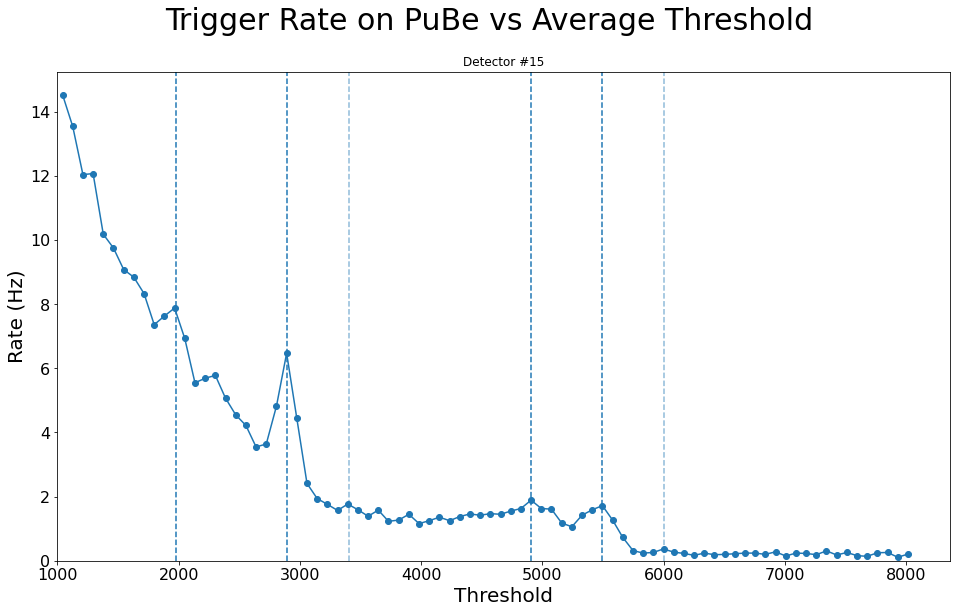

In [19]:
detnum = 15

plt.figure(figsize=(16,9))

plt.plot(thresh,ranges[detnum],label='det{:02d}'.format(detnum),marker='o')

plt.xlabel("Threshold",size=20)
plt.ylabel("Rate (Hz)",size=20)
plt.suptitle("Trigger Rate on PuBe vs Average Threshold",size=30)
plt.title("Detector #{:02d}".format(detnum))
plt.rc('xtick', labelsize=16) #fontsize of the x tick labels
plt.rc('ytick', labelsize=16) #fontsize of the y tick labels

plt.xlim(1000)
plt.ylim(0)

a = 1974
b = 2897
c = 3402
d = 4905
e = 5490
f = 6000

plt.axvline(a,linestyle='--')
plt.axvline(b,linestyle='--')
plt.axvline(c,linestyle='--',alpha=0.5)
plt.axvline(d,linestyle='--')
plt.axvline(e,linestyle='--')
plt.axvline(f,linestyle='--',alpha=0.5)

bins15 = [a,b,d,e]
energies15 = []

plt.show()

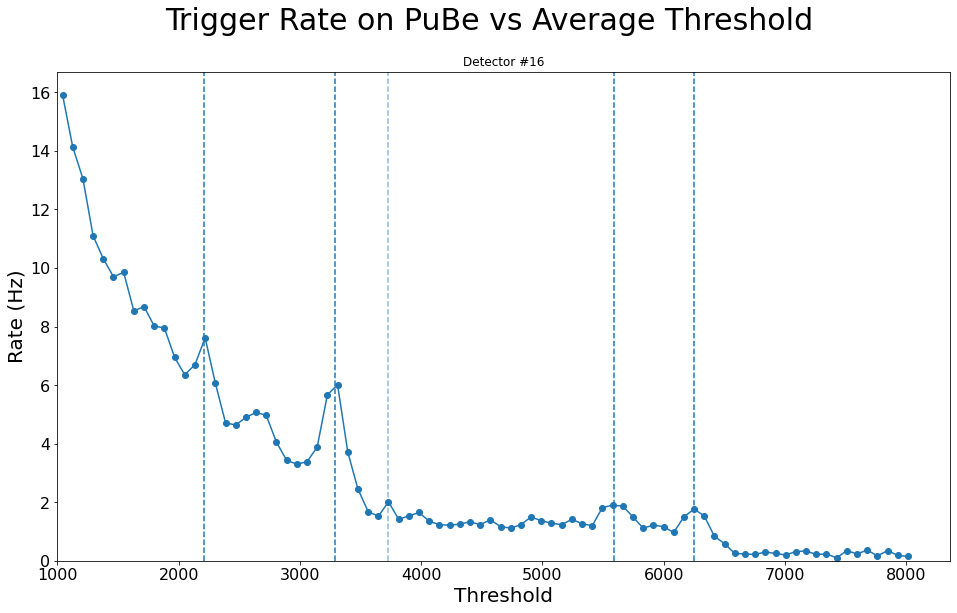

In [20]:
detnum = 16

plt.figure(figsize=(16,9))

plt.plot(thresh,ranges[detnum],label='det{:02d}'.format(detnum),marker='o')

plt.xlabel("Threshold",size=20)
plt.ylabel("Rate (Hz)",size=20)
plt.suptitle("Trigger Rate on PuBe vs Average Threshold",size=30)
plt.title("Detector #{:02d}".format(detnum))
plt.rc('xtick', labelsize=16) #fontsize of the x tick labels
plt.rc('ytick', labelsize=16) #fontsize of the y tick labels

plt.xlim(1000)
plt.ylim(0)

a = 2212
b = 3290
c = 3725
d = 5592
e = 6251

plt.axvline(a,linestyle='--')
plt.axvline(b,linestyle='--')
plt.axvline(c,linestyle='--',alpha=0.5)
plt.axvline(d,linestyle='--')
plt.axvline(e,linestyle='--')

bins16 = [a,b,d,e]
energies16 = []

plt.show()

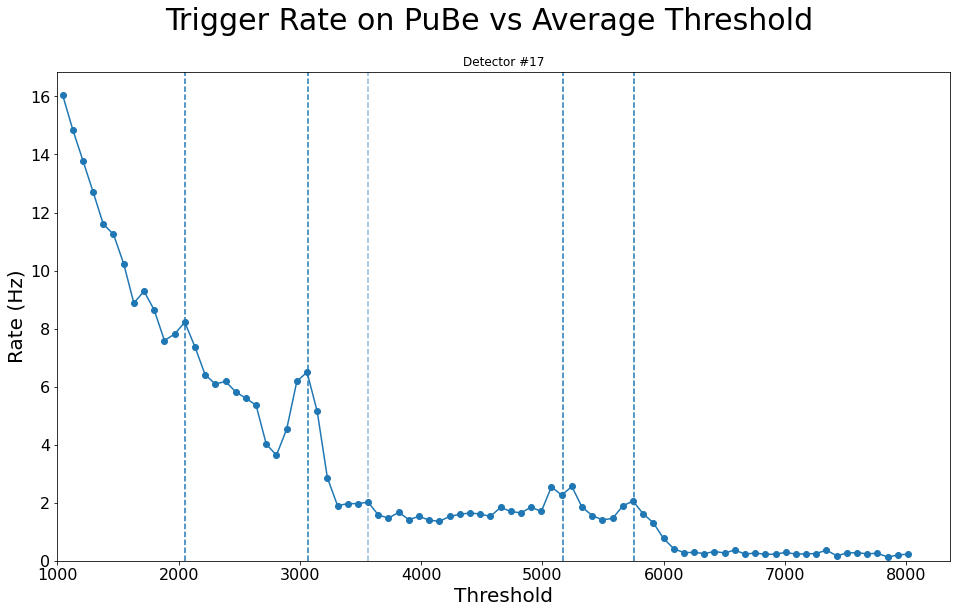

In [21]:
detnum = 17

plt.figure(figsize=(16,9))

plt.plot(thresh,ranges[detnum],label='det{:02d}'.format(detnum),marker='o')

plt.xlabel("Threshold",size=20)
plt.ylabel("Rate (Hz)",size=20)
plt.suptitle("Trigger Rate on PuBe vs Average Threshold",size=30)
plt.title("Detector #{:02d}".format(detnum))
plt.rc('xtick', labelsize=16) #fontsize of the x tick labels
plt.rc('ytick', labelsize=16) #fontsize of the y tick labels

plt.xlim(1000)
plt.ylim(0)

a = 2055
b = 3067
c = 3563
d = 5173
e = 5756

plt.axvline(a,linestyle='--')
plt.axvline(b,linestyle='--')
plt.axvline(c,linestyle='--',alpha=0.5)
plt.axvline(d,linestyle='--')
plt.axvline(e,linestyle='--')

bins17 = [a,b,d,e]
energies17 = []

plt.show()

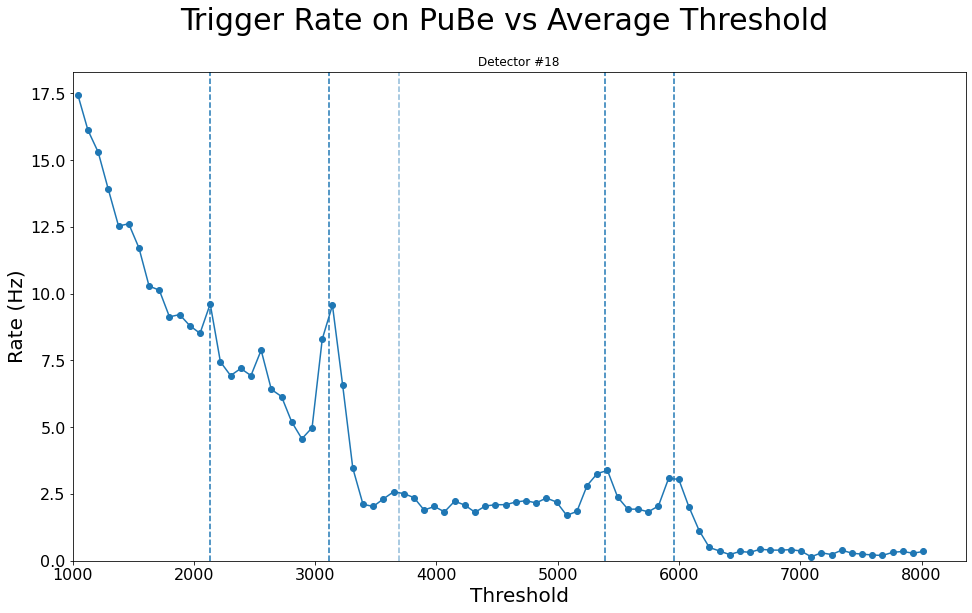

In [22]:
detnum = 18

plt.figure(figsize=(16,9))

plt.plot(thresh,ranges[detnum],label='det{:02d}'.format(detnum),marker='o')

plt.xlabel("Threshold",size=20)
plt.ylabel("Rate (Hz)",size=20)
plt.suptitle("Trigger Rate on PuBe vs Average Threshold",size=30)
plt.title("Detector #{:02d}".format(detnum))
plt.rc('xtick', labelsize=16) #fontsize of the x tick labels
plt.rc('ytick', labelsize=16) #fontsize of the y tick labels

plt.xlim(1000)
plt.ylim(0)

a = 2130
b = 3115
c = 3690
d = 5390
e = 5960

plt.axvline(2130,linestyle='--')
plt.axvline(3115,linestyle='--')
plt.axvline(3690,linestyle='--',alpha=0.5)
plt.axvline(5390,linestyle='--')
plt.axvline(5960,linestyle='--')

bins18 = [a,b,d,e]
energies18 = []

plt.show()

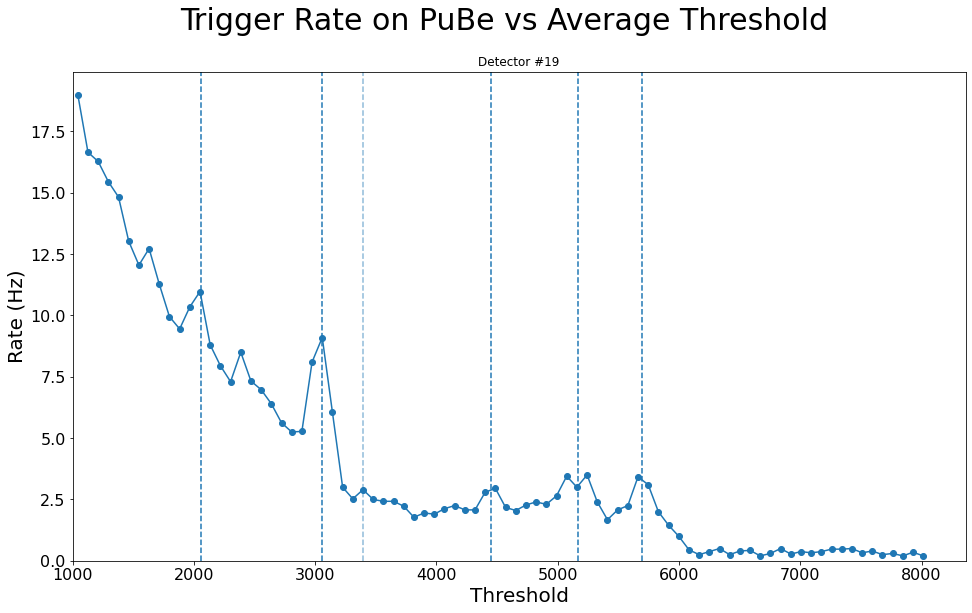

In [23]:
detnum = 19

plt.figure(figsize=(16,9))

plt.plot(thresh,ranges[detnum],label='det{:02d}'.format(detnum),marker='o')

plt.xlabel("Threshold",size=20)
plt.ylabel("Rate (Hz)",size=20)
plt.suptitle("Trigger Rate on PuBe vs Average Threshold",size=30)
plt.title("Detector #{:02d}".format(detnum))
plt.rc('xtick', labelsize=16) #fontsize of the x tick labels
plt.rc('ytick', labelsize=16) #fontsize of the y tick labels

plt.xlim(1000)
plt.ylim(0)

a = 2054
b = 3059
c = 3395
d = 4452
e = 5169
f = 5695

plt.axvline(2054,linestyle='--')
plt.axvline(3059,linestyle='--')
plt.axvline(3395,linestyle='--',alpha=0.5)
plt.axvline(4452,linestyle='--')
plt.axvline(5169,linestyle='--')
plt.axvline(5695,linestyle='--')

bins19 = [a,b,d,e,f]
energies19 = []

plt.show()

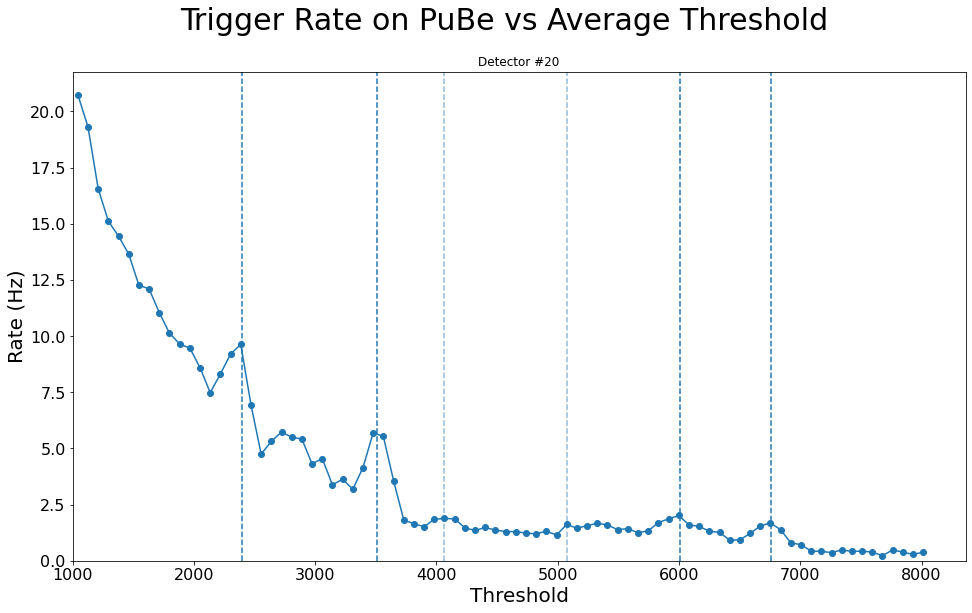

In [24]:
detnum = 20

plt.figure(figsize=(16,9))

plt.plot(thresh,ranges[detnum],label='det{:02d}'.format(detnum),marker='o')

plt.xlabel("Threshold",size=20)
plt.ylabel("Rate (Hz)",size=20)
plt.suptitle("Trigger Rate on PuBe vs Average Threshold",size=30)
plt.title("Detector #{:02d}".format(detnum))
plt.rc('xtick', labelsize=16) #fontsize of the x tick labels
plt.rc('ytick', labelsize=16) #fontsize of the y tick labels

plt.xlim(1000)
plt.ylim(0)

a = 2400
b = 3510
c = 4063
d = 5080
e = 6005
f = 6760

plt.axvline(a,linestyle='--')
plt.axvline(b,linestyle='--')
plt.axvline(c,linestyle='--',alpha=0.5)
plt.axvline(d,linestyle='--',alpha=0.5)
plt.axvline(e,linestyle='--')
plt.axvline(f,linestyle='--')

bins20 = [a,b,e,f]
energies20 = []

plt.show()

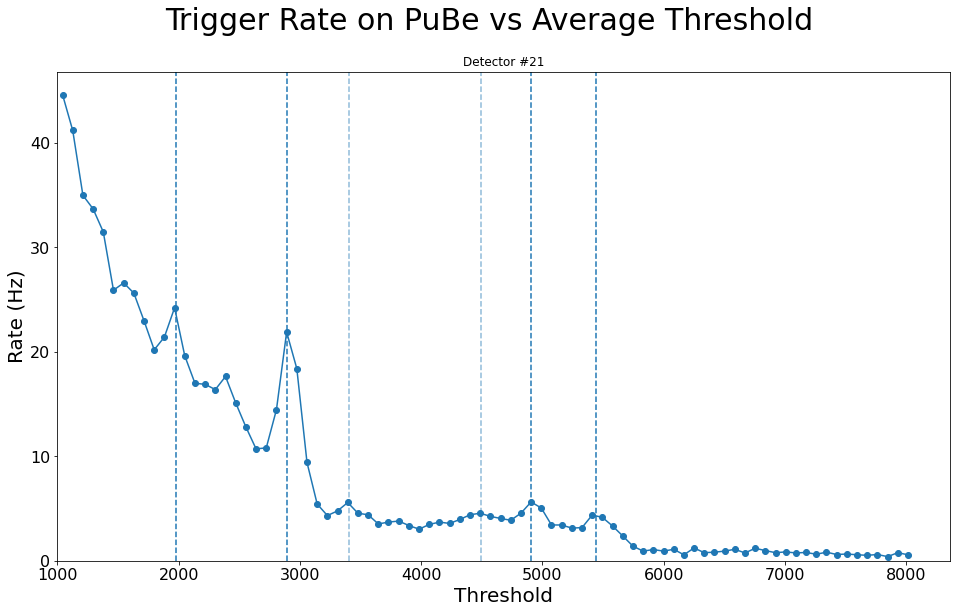

In [25]:
detnum = 21

plt.figure(figsize=(16,9))

plt.plot(thresh,ranges[detnum],label='det{:02d}'.format(detnum),marker='o')

plt.xlabel("Threshold",size=20)
plt.ylabel("Rate (Hz)",size=20)
plt.suptitle("Trigger Rate on PuBe vs Average Threshold",size=30)
plt.title("Detector #{:02d}".format(detnum))
plt.rc('xtick', labelsize=16) #fontsize of the x tick labels
plt.rc('ytick', labelsize=16) #fontsize of the y tick labels

plt.xlim(1000)
plt.ylim(0)

a = 1974
b = 2897 
c = 3401
d = 4496
e = 4905
f = 5445

plt.axvline(a,linestyle='--')
plt.axvline(b,linestyle='--')
plt.axvline(c,linestyle='--',alpha=0.5)
plt.axvline(d,linestyle='--',alpha=0.5)
plt.axvline(e,linestyle='--')
plt.axvline(f,linestyle='--')

bins21 = [a,b,e,f]
energies21 = []

plt.show()

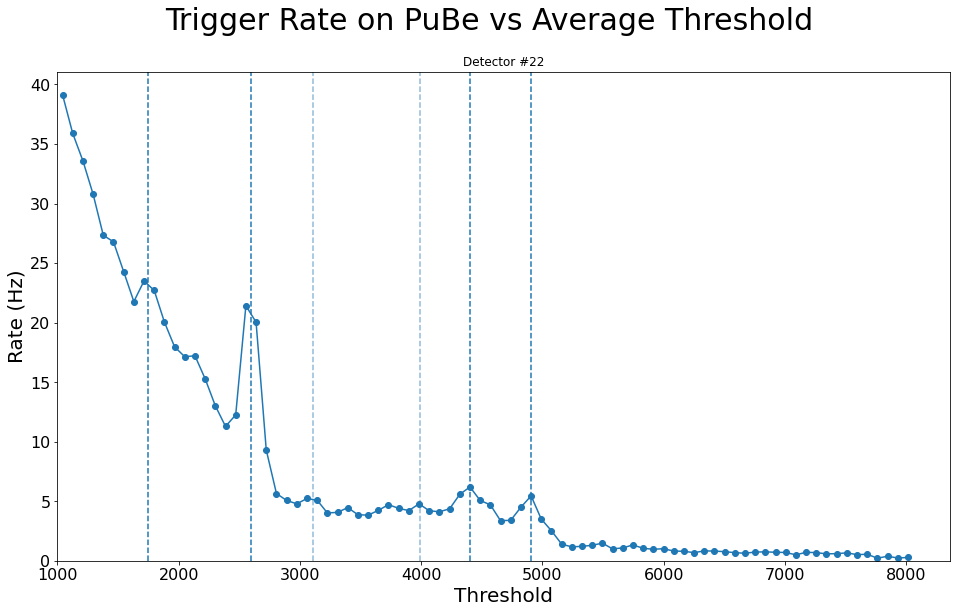

In [36]:
detnum = 22

plt.figure(figsize=(16,9))

plt.plot(thresh,ranges[detnum],label='det{:02d}'.format(detnum),marker='o')

plt.xlabel("Threshold",size=20)
plt.ylabel("Rate (Hz)",size=20)
plt.suptitle("Trigger Rate on PuBe vs Average Threshold",size=30)
plt.title("Detector #{:02d}".format(detnum))
plt.rc('xtick', labelsize=16) #fontsize of the x tick labels
plt.rc('ytick', labelsize=16) #fontsize of the y tick labels

plt.xlim(1000)
plt.ylim(0)

a = 1750
b = 2600
c = 3108
d = 3986
e = 4405
f = 4909

plt.axvline(a,linestyle='--')
plt.axvline(b,linestyle='--')
plt.axvline(c,linestyle='--',alpha=0.5)
plt.axvline(d,linestyle='--',alpha=0.5)
plt.axvline(e,linestyle='--')
plt.axvline(f,linestyle='--')

bins22 = [a,b,e,f]
energies22 = []

plt.show()

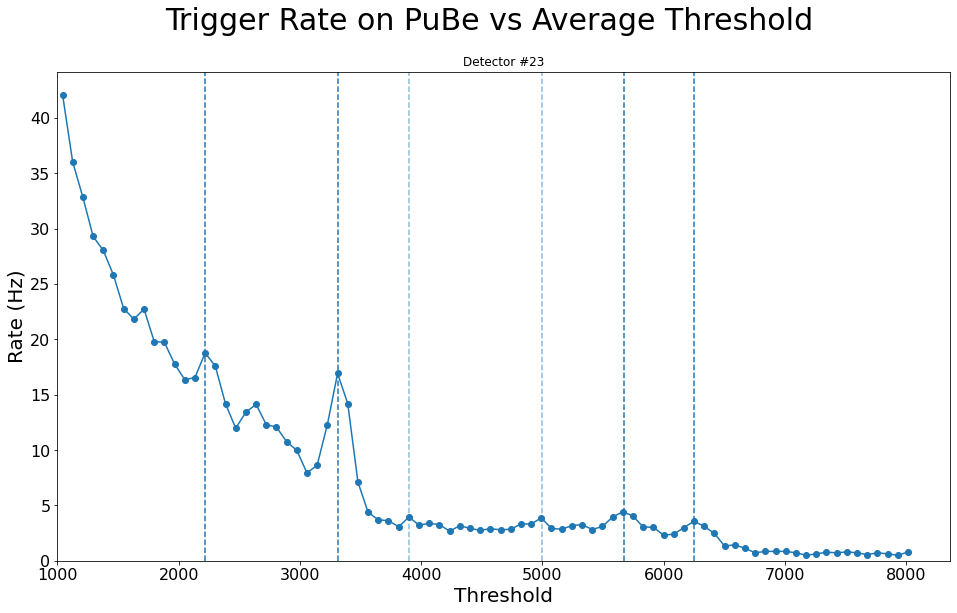

In [49]:
detnum = 23

plt.figure(figsize=(16,9))

plt.plot(thresh,ranges[detnum],label='det{:02d}'.format(detnum),marker='o')

plt.xlabel("Threshold",size=20)
plt.ylabel("Rate (Hz)",size=20)
plt.suptitle("Trigger Rate on PuBe vs Average Threshold",size=30)
plt.title("Detector #{:02d}".format(detnum))
plt.rc('xtick', labelsize=16) #fontsize of the x tick labels
plt.rc('ytick', labelsize=16) #fontsize of the y tick labels

plt.xlim(1000)
plt.ylim(0)

a = 2220
b = 3317
c = 3900
d = 4999
e = 5675
f = 6250

plt.axvline(a,linestyle='--')
plt.axvline(b,linestyle='--')
plt.axvline(c,linestyle='--',alpha=0.5)
plt.axvline(d,linestyle='--',alpha=0.5)
plt.axvline(e,linestyle='--')
plt.axvline(f,linestyle='--')

bins23 = [a,b,e,f]
energies23 = []

plt.show()